In [13]:
import numpy as np
import time
from sklearn.cluster import KMeans

import random
import math
import matplotlib.pyplot as plt

from collections import defaultdict

In [14]:
# Create a blob dataset for testing
blob = lambda x, y, stddev, n_samples: list(zip(
    np.random.normal(x, stddev, n_samples),
    np.random.normal(y, stddev, n_samples)
))

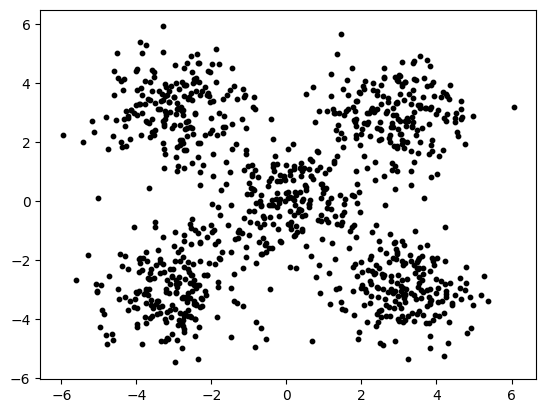

In [15]:
blobs_dataset = sum((blob(x, y, 1, 200) for x, y in [(0, 0), (3, 3), (-3, 3), (-3, -3), (3, -3)]), start=[])
plt.scatter(*zip(*blobs_dataset), s=10, color='black')
plt.show()

In [16]:
# Function to display the clustering/compute clusters 
def display_clusters(clusters):
    # get len(clusters) spaced out colors
    colors = plt.get_cmap('Accent')(np.linspace(0, 1, len(clusters)))
    for (cluster_center, cluster), color in zip(clusters.items(), colors):
        # plot the cluster center using a big marker
        plt.scatter(*cluster_center, s=1000, color=color, alpha=0.2)
        # plot the cluster points using small markers
        plt.scatter(*zip(*cluster), s=10, color=color)
    plt.show()

def compute_clusters(X, cluster_centers):
    '''
    Given fixed cluster centers, computes the clusters of each cluster center c
    with respect to X, i.e. the set of points whose nearest cluster center is c.
    
    Returns:
        clusters (dict): the clusters as sets of points (tuples of floats),
            keyed by their cluster center
    '''
    #Suppose the points are in R^d, and let n be the length of x and c the length of cc, then x has shape (n,d), cc(cluster center) has shap (c,d)
    X, cluster_centers = np.array(X), np.array(cluster_centers)
    # TODO: Implement this, and use the following two cells to ensure it works.
    #     We will probably do this together because numpy is hard.
    diff = X - np.repeat(cluster_centers[:,np.newaxis,:],len(X), axis=1)  # difference between vectors in X and vectors in cc.  
    # has shape(c,1,d) - repeat array n times - have c by n by d arrray
    # after repeat: has shape (c,n,d) - repeat for len(X) times, along axis 1
    norms = np.linalg.norm(diff, axis=2) # has shape (c,n) # norm out axis 2. 
    closest_cc = cluster_centers[np.argmin(norms, axis=0)] #had shape (n,) - now shape(n,d)
    clusters = defaultdict(set)
    for x, cluster_centers in zip(X,closest_cc):
        clusters[tuple(cluster_centers)].add(tuple(x))
    return dict(clusters)

In [17]:
# Method 1 of constructing Kmeans algorithm:
# TODO: Make a `KMeans` class that implements the KMeans algorithm and passes
#    the tests in the following cell. In particular, your implementation
#    should basically live in the `__init__` method and should store the
#    results in `converged` and `clusters` attributes.
class KMeans1:
    def __init__(self, X, K, max_iter=300): #K - # of clusters
        self.X, self.K = X,K
        self.cluster_centers = random.sample(X,k=K)
        for i in range(max_iter):
            new_cluster_centers = [tuple(np.mean(list(cluster), axis=0)) for cluster in self.clusters.values()]
            if set(self.cluster_centers) == set(new_cluster_centers):
                self.converged = True
                break
            self.cluster_centers = new_cluster_centers
        else:#did not break - self.converged = False
            self.converged = False
    
    @property #doesn't need to be immediately available - can code more lazily - use it when need it. 
    def clusters(self):
        return compute_clusters(self.X, self.cluster_centers)
    #pick K points in X to be the initial ccs. 
    #repeat:
        #find the clusters corresponding to the current cc's, take the menas of each cluster to be the new cc's, until the cc's stop changing.

kmeans_blobs.converged=True


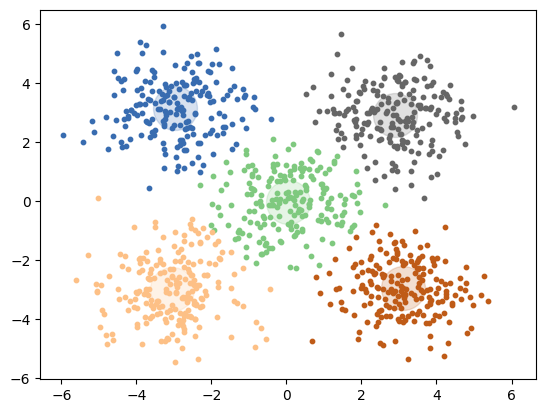

In [18]:
# Test Method 1 using blobs dataset
kmeans_blobs = KMeans1(blobs_dataset, 5)
print(f'{kmeans_blobs.converged=}')
display_clusters(kmeans_blobs.clusters)

In [19]:
# Algorithm & pseudocode for the k-means algorithm.
# step 1: randomly initialize K cluster centers, initialize iteration to 0
# step 2: repeat untill convergence or iteration reaches max iteration
#     increment iteration by 1
#     step 2-1: for each data point x in X: assign x to the nearest cluster center
#     step 2-2: for each cluster center: update the center to the mean of assigned data points
#     step 2-3: check for convergence
# end

In [20]:
# Method 2: Implementaion of the custom KMeans function(following the pseudocode):
def Kmeans(X, K, iter_max = 300):
	np.random.seed(0)
	# step 1:
	centers = X[np.random.choice(range(len(X)), size=K, replace=False)]
	
	# step 2:
	for iter in range(iter_max):
		# step 2-1:
		labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centers, axis=2), axis=1)
		# step 2-2:
		new_centers = np.array([X[labels==k].mean(axis=0) for k in range(K)])
		# step 2-3:
		if np.all(centers==new_centers):
			break
		centers = new_centers
	return labels, centers

In [21]:
# Comparing execution time between sklearn's kmeans and the custom kmeans above.
# Create a dataset for testing.
dataset = np.random.rand(100, 3)
K = 3
iter_max = 300


# Record the execution time for custom kmeans
start_time_custom = time.time()
labels,centers = Kmeans(dataset, K, iter_max)
custom_kmeans_execution_time = time.time() - start_time_custom


# Record the execution time for sklearn's kmeans
start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=K, max_iter = iter_max, random_state=0, n_init=1, init='random').fit(dataset)
sklearn_kmeans_execution_time = time.time() - start_time_sklearn

print("Custom kmeans execution time: ", custom_kmeans_execution_time, " seconds;")
print("sklearn kmeans execution time: ", sklearn_kmeans_execution_time, " seconds;")


Custom kmeans execution time:  0.004949092864990234  seconds;
sklearn kmeans execution time:  0.017584800720214844  seconds;
